In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Lectura de Dataset

In [36]:
df = pd.read_excel("C:/Users/UserPro/Examen_Python_ADEP/" + "Datos.xlsx")

In [37]:
df.head()

,id,ESTACION,Coordenates X (ETRS89),Coordenates Y (ETRS89),NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3),Province,Town,Address
0,1,3_DE_MARZO,527141.4365,4.744883e+06,8.782967,21.189560,34.472527,13.518414,Araba/Álava,Vitoria-Gasteiz,"Plaza Tres de Marzo, s/n"
1,2,ABANTO,493987.1750,4.796407e+06,5.199446,16.462604,24.204420,12.486567,Bizkaia,Abanto y Ciérvana-Abanto Zierbena,"Avda. del Minero, 2. Ayuntamiento"
2,3,AGURAIN,549539.1393,4.744226e+06,4.480556,10.763889,17.708333,13.538674,Araba/Álava,Agurain/Salvatierra,"C/ Fueros, 11. Subcomisaría de la Ertzaintza."
3,4,ALGORTA_BBIZI2,498154.0000,4.801022e+06,6.953297,13.560440,24.123626,20.903846,Bizkaia,Getxo,"Carretera de Galea, s/n"
4,5,ALONSOTEGI,500972.2158,4.788307e+06,2.454545,11.559659,15.312500,12.463687,Bizkaia,Alonsotegi,"C/ Baztieta, s/n. Bº Irauregi"


# 2 División de las Coordenadas

In [38]:
df["X"] = df['Coordenates X (ETRS89)']/10000
df["Y"] = df ['Coordenates Y (ETRS89)']/10000
df.head()

,id,ESTACION,Coordenates X (ETRS89),Coordenates Y (ETRS89),NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3),Province,Town,Address,X,Y
0,1,3_DE_MARZO,527141.4365,4.744883e+06,8.782967,21.189560,34.472527,13.518414,Araba/Álava,Vitoria-Gasteiz,"Plaza Tres de Marzo, s/n",52.714144,474.488289
1,2,ABANTO,493987.1750,4.796407e+06,5.199446,16.462604,24.204420,12.486567,Bizkaia,Abanto y Ciérvana-Abanto Zierbena,"Avda. del Minero, 2. Ayuntamiento",49.398717,479.640656
2,3,AGURAIN,549539.1393,4.744226e+06,4.480556,10.763889,17.708333,13.538674,Araba/Álava,Agurain/Salvatierra,"C/ Fueros, 11. Subcomisaría de la Ertzaintza.",54.953914,474.422637
3,4,ALGORTA_BBIZI2,498154.0000,4.801022e+06,6.953297,13.560440,24.123626,20.903846,Bizkaia,Getxo,"Carretera de Galea, s/n",49.815400,480.102200
4,5,ALONSOTEGI,500972.2158,4.788307e+06,2.454545,11.559659,15.312500,12.463687,Bizkaia,Alonsotegi,"C/ Baztieta, s/n. Bº Irauregi",50.097222,478.830747


In [40]:
variables = ["X", "Y", "PM10 (µg/m3)"]
df2 = pd.DataFrame(df[variables])
df2.head()

,X,Y,PM10 (µg/m3)
0,52.714144,474.488289,13.518414
1,49.398717,479.640656,12.486567
2,54.953914,474.422637,13.538674
3,49.815400,480.102200,20.903846
4,50.097222,478.830747,12.463687


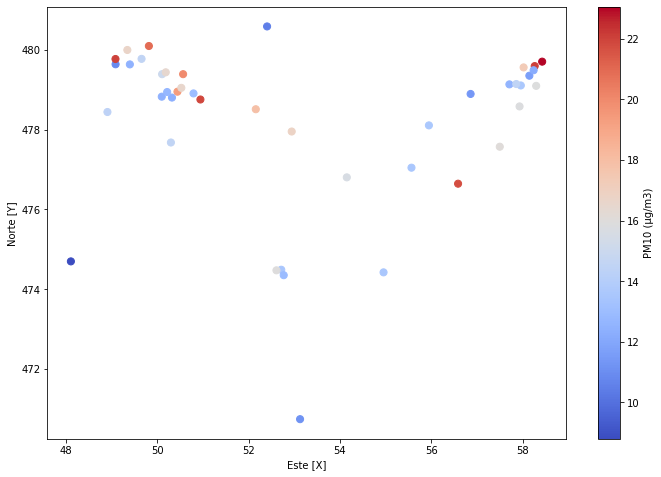

In [41]:
plt.subplot(111)
plt.scatter(df2["X"], df["Y"], c=df["PM10 (µg/m3)"], s=50, marker="o", cmap=plt.cm.coolwarm)
cbar = plt.colorbar()
cbar.set_label("PM10 (µg/m3)", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1.5, wspace=0, hspace=0)
plt.show()

# 3 Grilla 2x2

In [44]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,43.0,53.233151,3.519476,48.107367,50.200022,52.608603,57.179722,58.427223
Y,43.0,478.225831,2.035226,470.738947,477.818819,478.947507,479.468235,480.593245
PM10 (µg/m3),43.0,15.311702,3.559351,8.801170,12.630450,14.580175,16.789548,23.050000


In [86]:
grid_x = np.linspace(48,60, num=6, endpoint=False)
grid_y = np.linspace(470,482, num=6, endpoint=False)

yg, xg = np.meshgrid(grid_x, grid_y, indexing="ij")

x_g = xg.ravel()
y_g = yg.ravel()

# 4 Interpolacion RBF

In [87]:
from scipy.interpolate import Rbf

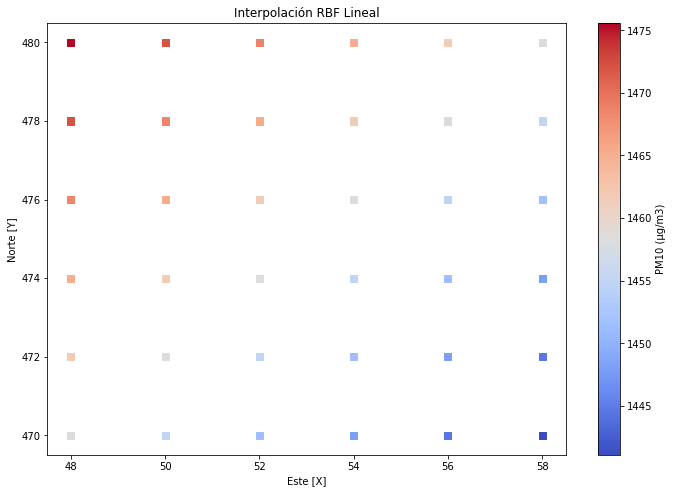

In [90]:
x = df2["X"]
y = df2["Y"]
u = df2["PM10 (µg/m3)"]

rbf = Rbf(x, y, u, function="linear")
ZI = rbf(xg,yg)

plt.subplot(111)
plt.scatter(yg, xg, marker="s", s=50, c=ZI, cmap=plt.cm.coolwarm)
cbar = plt.colorbar()
cbar.set_label("PM10 (µg/m3)")
plt.title("Interpolación RBF Lineal")
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1.5, wspace=0, hspace=0)
plt.show()

# Histogramas

In [103]:
v = ZI.ravel()
v

array([1458.3849893 , 1461.80986806, 1465.24299745, 1468.68431962,
       1472.13377712, 1475.59131289, 1454.90799242, 1458.34103661,
       1461.78231266, 1465.23176257, 1468.68932874, 1472.15495401,
       1451.43907745, 1454.88030694, 1458.32974918, 1461.78734605,
       1465.25303982, 1468.72677318, 1447.97830248, 1451.42773699,
       1454.88536485, 1458.35112777, 1461.8249679 , 1465.3068278 ,
       1444.525726  , 1447.98338514, 1451.44921787, 1454.92316579,
       1458.40517091, 1461.89517566, 1441.08140695, 1444.54731016,
       1448.02136689, 1451.50351861, 1454.99370719, 1458.49187495])

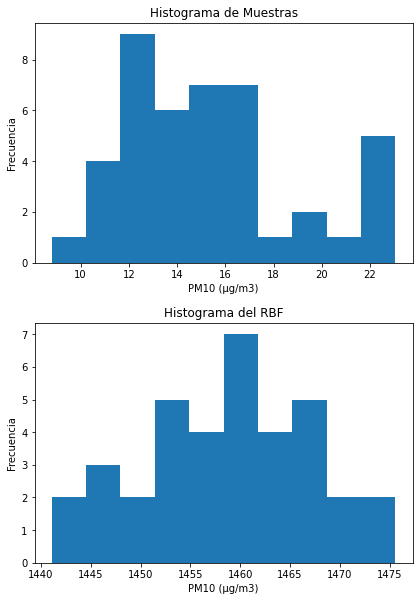

In [116]:
%matplotlib inline

plt.subplot(211)
plt.hist(u)
plt.title("Histograma de Muestras")
plt.xlabel("PM10 (µg/m3)")
plt.ylabel("Frecuencia")

plt.subplot(212)
plt.hist(v)
plt.title("Histograma del RBF")
plt.xlabel("PM10 (µg/m3)")
plt.ylabel("Frecuencia")
plt.subplots_adjust(right=1, top=2, hspace=0.25)

plt.show()